#  Solving TSP using A* search with MST heuristic

# Index


+ 1. Libraries
+ 2. Implementation
+ 3. Execution using different test cases
     + 3.1 Case A : Partially connected graph where path can exist 
     + 3.2 Case B : Partially connected graph where path cannot exist
     + 3.3 Case C : Fully connected graph where solution always exist
         + 3.3.1 Example 1
         + 3.3.2 Example 2
     + 3.4 Case D : Disconnected graph where solution never exist
+ 4. Testing using Large Fully Connected Graphs
     + 4.1 Example 1 (Graph with 10 nodes)
     + 4.2 Example 2 (Graph with 50 nodes)
+ 5. Final Remarks

# 1. Libraries

In [18]:
import heapq # priority queue
import math # to initialize minimum to infinity
from collections import defaultdict # dictionary of lists
import numpy as np # for generating random weights in large graph
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # to show graph

# 2. Implementation

In [19]:
# class that represents a graph
class Graph:

    def __init__(self,vertices):
        self.nodes = [] #list of nodes 
        for i in range(len(vertices)):
            self.nodes.append(vertices[i])
        self.edges = []           # to store graph 
        # dictionary with the lists of successors of each node, faster to get the successors
        # each item of list is a 2-tuple: (destination, weight)
        self.successors = defaultdict(list)


    # function that adds edges
    def addEdge(self,u,v,w): 
        for edges in self.edges:
            if u==edges[0] and v==edges[1]:
                print("Edge already exists")
                return
        self.edges.append([u,v,w])
        self.successors[u].append((v, w))
    
    # function that run the "A*" algorithm
    def executeAStar(self, initial_node):
        if not self.edges:
            print('Error: graph not contains edges!!')
        else:
            # checks if source node exists
            print("Initial node:",initial_node)
            if initial_node in self.nodes:

                queue = PriorityQueue() # creates a priority queue (min heap)
                iteration=1
                # calculates costs
                g_cost, h_cost = 0, self.PrimsMST(initial_node)
                f_cost = g_cost + h_cost
                queue.insert((initial_node, g_cost, h_cost), f_cost)
                # visited_nodes keeps the track of order of visited nodes added to the path
                # visited_nodes acts like a closed list
                visited_nodes = []
                visited_nodes.append(initial_node)
                while len(visited_nodes) < len(self.nodes):
                    print("-------------------Iteration no.",iteration,"-------------------")
                    # check if children there is any node remained to expand while goal state is not reached
                    if queue.isEmpty():
                        print("Error : Goal state cannot be reached. Graph is not connected")
                        return 0,[]
                    # a item of the queue is a 3-tuple: (current_node, g_cost, h_cost)
                    current_node, g_cost, h_cost = queue.remove()
                    # remaining_nodes is generated by checking unexpanded neighbous for current_node
                    # functionality of remaining_nodes partially resembles the functionality of fringe_list
                    remaining_nodes = []
                    # gets all the successors of "current_node"
                    successors = self.successors[current_node]
                    minimum = math.inf
                    a,b,c,d=0,0,0,0
                    temp_successors=[]
                    for successor in successors:
                        if successor[0] not in visited_nodes:
                            temp_successors.append(successor)
                    print("Successor of",current_node,": ",temp_successors)
                    if len(temp_successors)!= 0:
                        for successor in temp_successors:
                            # empty remaining_nodes to remove nodes from the previous iterations
                            remaining_nodes.clear()
                            destination, weight = successor # unpack 2-tuple successor
                            # add unvisited nodes to remaining_nodes
                            for i in self.nodes:
                                if i not in visited_nodes:
                                    remaining_nodes.append(i)
                            print("Remaining nodes:",remaining_nodes)
                            # if remaining node contains a single unvisited node, h_cost = 0 for that single node
                            if len(remaining_nodes)==1:
                                new_g_cost = g_cost + weight
                                h_cost = 0
                                f_cost = new_g_cost + h_cost
                                print("Node:",destination,"f_cost:",f_cost,"g_cost:",new_g_cost,"h_cost:",h_cost)
                                a,b,c,d=destination,f_cost,new_g_cost,h_cost
                            else:
                                # create a temorary graph using nodes from remaining_nodes 
                                temp_graph = Graph(remaining_nodes)
                                # add edges to temporary graph if remaining_nodes exist in original graph 
                                for temp_edge in self.edges:
                                    if temp_edge[0] in remaining_nodes and temp_edge[1] in remaining_nodes:
                                        temp_graph.addEdge(temp_edge[0],temp_edge[1],temp_edge[2]) 
                                # calculates costs for temporary graph
                                new_g_cost = g_cost + weight
                                h_cost = temp_graph.PrimsMST(destination)
                                f_cost = new_g_cost + h_cost
                                print("Node:",destination,"f_cost:",f_cost,"g_cost:",new_g_cost,"h_cost:",h_cost)
                                # choose the minimum f_cost of all the successors
                                if f_cost < minimum :
                                    minimum = f_cost
                                    a,b,c,d=destination,f_cost,new_g_cost,h_cost
                        print("CHOSEN NODE : \nParent:",current_node,"Child:",a,"f_cost:",b,"g_cost:",c,"h_cost:",d)
                        destination=a
                        f_cost=b
                        new_g_cost=c
                        h_cost=d
                        # add this minimum node to visited_nodes whuch represents our path
                        visited_nodes.append(destination)
                        # add the minimum successor to queue
                        queue.insert((destination, new_g_cost, h_cost), f_cost)
                        print("Visited nodes till now:",visited_nodes)
                        iteration = iteration + 1
                        # verifies that reached the goal
                        if len(visited_nodes) == len(self.nodes):
                            print("\n===========Goal state reached===========\n")

                if len(visited_nodes) == len(self.nodes): 
                    return visited_nodes
            else:
                print('Error: the node(s) not exists in the graph!!')

    # function to get the cost of optimal path found
    def get_cost(self,visited_nodes):
        if len(visited_nodes)<=1:
            return 0
        else:
            total_cost=0
            i=1
            while i<len(visited_nodes):
                for temp_edge in self.edges:
                    if visited_nodes[i-1]==temp_edge[0] and visited_nodes[i]==temp_edge[1]:
                        total_cost=total_cost+temp_edge[2]
                i=i+1
            for temp_edge in self.edges:
                    if visited_nodes[0]==temp_edge[0] and visited_nodes[len(visited_nodes) - 1]==temp_edge[1]:
                        total_cost=total_cost+temp_edge[2]
            return total_cost
        
    def PrimsMST(self,source):
        priority_queue = { source : 0 }
        added = [False] * len(self.edges)
        min_span_tree_cost = 0

        while priority_queue :
            # Choose the adjacent node with the least edge cost
            node = min(priority_queue, key=priority_queue.get)
            cost = priority_queue[node]

            # Remove the element from a dictionary in python
            del priority_queue[node]
            if node < len(added) and added[node] == False :
                min_span_tree_cost += cost
                added[node] = True
                for item in self.successors[node] :
                    adjnode = item[0]
                    adjcost = item[1]
                    if adjnode < len(added) and added[adjnode] == False :
                        priority_queue[adjnode] = adjcost

        return min_span_tree_cost

In [20]:
# class that represents a priority queue
class PriorityQueue:

    def __init__(self):
        self._queue = []
        self._index = 0

    def insert(self, item, priority):
        heapq.heappush(self._queue, (priority, self._index, item))
        self._index += 1

    def remove(self):
        return heapq.heappop(self._queue)[-1]

    def isEmpty(self):
        return len(self._queue) == 0

    def getSize(self):
        return self._index


In [21]:
def print_path(path):
    print("=================Path found=================")
    print("final path:")
    for i in range(len(path)-1):
        print(path[i],"->",path[i+1])
    print(path[len(path)-1],"->",path[0])

# 3. Execution using different test cases

## 3.1 Case A : Partially connected graph where path can exist

### source = 0

Populating the interactive namespace from numpy and matplotlib


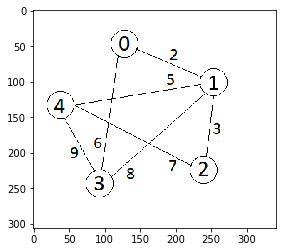

In [22]:
%pylab inline

img = mpimg.imread('partially_connected.png')
imgplot = plt.imshow(img)
plt.show()

In [23]:
g = Graph([0,1,2,3,4]) 
g.addEdge(0, 1, 2) 
g.addEdge(1, 0, 2)

g.addEdge(0, 3, 6) 
g.addEdge(3, 0, 6)

g.addEdge(1, 2, 3) 
g.addEdge(2, 1, 3)

g.addEdge(1, 3, 8) 
g.addEdge(3, 1, 8)
 
g.addEdge(1, 4, 5) 
g.addEdge(4, 1, 5)

g.addEdge(4, 2, 7) 
g.addEdge(2, 4, 7)

g.addEdge(3, 4, 9) 
g.addEdge(4, 3, 9)



path = g.executeAStar(0) # executes the algorithm
total_cost = g.get_cost(path)
if total_cost:
    print_path(path)
    print("total_cost",total_cost)
else:
    print('Did not reach the goal!')

Initial node: 0
-------------------Iteration no. 1 -------------------
Successor of 0 :  [(1, 2), (3, 6)]
Remaining nodes: [1, 2, 3, 4]
Node: 1 f_cost: 21 g_cost: 2 h_cost: 19
Remaining nodes: [1, 2, 3, 4]
Node: 3 f_cost: 24 g_cost: 6 h_cost: 18
CHOSEN NODE : 
Parent: 0 Child: 1 f_cost: 21 g_cost: 2 h_cost: 19
Visited nodes till now: [0, 1]
-------------------Iteration no. 2 -------------------
Successor of 1 :  [(2, 3), (3, 8), (4, 5)]
Remaining nodes: [2, 3, 4]
Node: 2 f_cost: 5 g_cost: 5 h_cost: 0
Remaining nodes: [2, 3, 4]
Node: 3 f_cost: 10 g_cost: 10 h_cost: 0
Remaining nodes: [2, 3, 4]
Node: 4 f_cost: 7 g_cost: 7 h_cost: 0
CHOSEN NODE : 
Parent: 1 Child: 2 f_cost: 5 g_cost: 5 h_cost: 0
Visited nodes till now: [0, 1, 2]
-------------------Iteration no. 3 -------------------
Successor of 2 :  [(4, 7)]
Remaining nodes: [3, 4]
Node: 4 f_cost: 12 g_cost: 12 h_cost: 0
CHOSEN NODE : 
Parent: 2 Child: 4 f_cost: 12 g_cost: 12 h_cost: 0
Visited nodes till now: [0, 1, 2, 4]
---------------

## 3.2 Case B : Partially connected graph where path cannot exist

### source = 4

Populating the interactive namespace from numpy and matplotlib


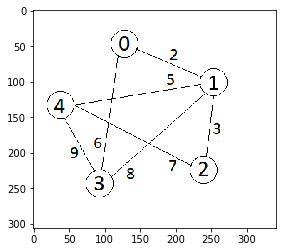

In [24]:
%pylab inline

img = mpimg.imread('partially_connected.png')
imgplot = plt.imshow(img)
plt.show()

In [25]:
g = Graph([0,1,2,3,4]) 
g.addEdge(0, 1, 2) 
g.addEdge(1, 0, 2)

g.addEdge(0, 3, 6) 
g.addEdge(3, 0, 6)

g.addEdge(1, 2, 3) 
g.addEdge(2, 1, 3)

g.addEdge(1, 3, 8) 
g.addEdge(3, 1, 8)
 
g.addEdge(1, 4, 5)  
g.addEdge(4, 1, 5)

g.addEdge(4, 2, 7) 
g.addEdge(2, 4, 7)

g.addEdge(3, 4, 9) 
g.addEdge(4, 3, 9)



path = g.executeAStar(4) # executes the algorithm
total_cost = g.get_cost(path)
if total_cost:
    print_path(path)
    print("total_cost",total_cost)
else:
    print('Did not reach the goal!')

Initial node: 4
-------------------Iteration no. 1 -------------------
Successor of 4 :  [(1, 5), (2, 7), (3, 9)]
Remaining nodes: [0, 1, 2, 3]
Node: 1 f_cost: 16 g_cost: 5 h_cost: 11
Remaining nodes: [0, 1, 2, 3]
Node: 2 f_cost: 18 g_cost: 7 h_cost: 11
Remaining nodes: [0, 1, 2, 3]
Node: 3 f_cost: 20 g_cost: 9 h_cost: 11
CHOSEN NODE : 
Parent: 4 Child: 1 f_cost: 16 g_cost: 5 h_cost: 11
Visited nodes till now: [4, 1]
-------------------Iteration no. 2 -------------------
Successor of 1 :  [(0, 2), (2, 3), (3, 8)]
Remaining nodes: [0, 2, 3]
Node: 0 f_cost: 7 g_cost: 7 h_cost: 0
Remaining nodes: [0, 2, 3]
Node: 2 f_cost: 8 g_cost: 8 h_cost: 0
Remaining nodes: [0, 2, 3]
Node: 3 f_cost: 13 g_cost: 13 h_cost: 0
CHOSEN NODE : 
Parent: 1 Child: 0 f_cost: 7 g_cost: 7 h_cost: 0
Visited nodes till now: [4, 1, 0]
-------------------Iteration no. 3 -------------------
Successor of 0 :  [(3, 6)]
Remaining nodes: [2, 3]
Node: 3 f_cost: 13 g_cost: 13 h_cost: 0
CHOSEN NODE : 
Parent: 0 Child: 3 f_cost

## 3.3 Case C : Fully connected graph where solution always exist

### 3.3.1 Example 1 for fully connected graph:

Populating the interactive namespace from numpy and matplotlib


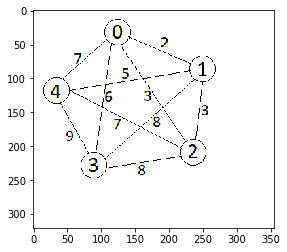

In [26]:
%pylab inline

img = mpimg.imread('fully_connected1.png')
imgplot = plt.imshow(img)
plt.show()

### source=0

In [27]:
g = Graph([0,1,2,3,4])

g.addEdge(0, 1, 2) 
g.addEdge(1, 0, 2)

g.addEdge(0,2,3)
g.addEdge(2,0,3)

g.addEdge(0, 3, 6) 
g.addEdge(3, 0, 6)

g.addEdge(0, 4, 7) 
g.addEdge(4, 0, 7)

g.addEdge(1, 2, 3) 
g.addEdge(2, 1, 3)

g.addEdge(1, 3, 8) 
g.addEdge(3, 1, 8)
 
g.addEdge(1, 4, 5) 
g.addEdge(4, 1, 5)

g.addEdge(3, 2, 8) 
g.addEdge(2, 3, 8)

g.addEdge(4, 2, 7) 
g.addEdge(2, 4, 7)

g.addEdge(3, 4, 9) 
g.addEdge(4, 3, 9)

path = g.executeAStar(0) # executes the algorithm
total_cost = g.get_cost(path)
if total_cost:
    print_path(path)
    print("total_cost",total_cost)
else:
    print('Did not reach the goal!')

Initial node: 0
-------------------Iteration no. 1 -------------------
Successor of 0 :  [(1, 2), (2, 3), (3, 6), (4, 7)]
Remaining nodes: [1, 2, 3, 4]
Node: 1 f_cost: 21 g_cost: 2 h_cost: 19
Remaining nodes: [1, 2, 3, 4]
Node: 2 f_cost: 20 g_cost: 3 h_cost: 17
Remaining nodes: [1, 2, 3, 4]
Node: 3 f_cost: 24 g_cost: 6 h_cost: 18
Remaining nodes: [1, 2, 3, 4]
Node: 4 f_cost: 23 g_cost: 7 h_cost: 16
CHOSEN NODE : 
Parent: 0 Child: 2 f_cost: 20 g_cost: 3 h_cost: 17
Visited nodes till now: [0, 2]
-------------------Iteration no. 2 -------------------
Successor of 2 :  [(1, 3), (3, 8), (4, 7)]
Remaining nodes: [1, 3, 4]
Node: 1 f_cost: 20 g_cost: 6 h_cost: 14
Remaining nodes: [1, 3, 4]
Node: 3 f_cost: 24 g_cost: 11 h_cost: 13
Remaining nodes: [1, 3, 4]
Node: 4 f_cost: 23 g_cost: 10 h_cost: 13
CHOSEN NODE : 
Parent: 2 Child: 1 f_cost: 20 g_cost: 6 h_cost: 14
Visited nodes till now: [0, 2, 1]
-------------------Iteration no. 3 -------------------
Successor of 1 :  [(3, 8), (4, 5)]
Remaining 

### source = 1

In [28]:
g = Graph([0,1,2,3,4])

g.addEdge(0, 1, 2) 
g.addEdge(1, 0, 2)

g.addEdge(0,2,3)
g.addEdge(2,0,3)

g.addEdge(0, 3, 6) 
g.addEdge(3, 0, 6)

g.addEdge(0, 4, 7) 
g.addEdge(4, 0, 7)

g.addEdge(1, 2, 3) 
g.addEdge(2, 1, 3)

g.addEdge(1, 3, 8) 
g.addEdge(3, 1, 8)
 
g.addEdge(1, 4, 5) 
g.addEdge(4, 1, 5)

g.addEdge(3, 2, 8) 
g.addEdge(2, 3, 8)

g.addEdge(4, 2, 7) 
g.addEdge(2, 4, 7)

g.addEdge(3, 4, 9) 
g.addEdge(4, 3, 9)

path = g.executeAStar(1) # executes the algorithm
total_cost = g.get_cost(path)
if total_cost:
    print_path(path)
    print("total_cost",total_cost)
else:
    print('Did not reach the goal!')

Initial node: 1
-------------------Iteration no. 1 -------------------
Successor of 1 :  [(0, 2), (2, 3), (3, 8), (4, 5)]
Remaining nodes: [0, 2, 3, 4]
Node: 0 f_cost: 21 g_cost: 2 h_cost: 19
Remaining nodes: [0, 2, 3, 4]
Node: 2 f_cost: 21 g_cost: 3 h_cost: 18
Remaining nodes: [0, 2, 3, 4]
Node: 3 f_cost: 24 g_cost: 8 h_cost: 16
Remaining nodes: [0, 2, 3, 4]
Node: 4 f_cost: 23 g_cost: 5 h_cost: 18
CHOSEN NODE : 
Parent: 1 Child: 0 f_cost: 21 g_cost: 2 h_cost: 19
Visited nodes till now: [1, 0]
-------------------Iteration no. 2 -------------------
Successor of 0 :  [(2, 3), (3, 6), (4, 7)]
Remaining nodes: [2, 3, 4]
Node: 2 f_cost: 21 g_cost: 5 h_cost: 16
Remaining nodes: [2, 3, 4]
Node: 3 f_cost: 23 g_cost: 8 h_cost: 15
Remaining nodes: [2, 3, 4]
Node: 4 f_cost: 24 g_cost: 9 h_cost: 15
CHOSEN NODE : 
Parent: 0 Child: 2 f_cost: 21 g_cost: 5 h_cost: 16
Visited nodes till now: [1, 0, 2]
-------------------Iteration no. 3 -------------------
Successor of 2 :  [(3, 8), (4, 7)]
Remaining no

### 3.3.2 Example 2 for fully connected graph

Populating the interactive namespace from numpy and matplotlib


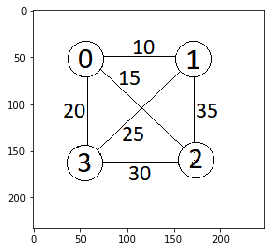

In [29]:
%pylab inline

img = mpimg.imread('fully_connected2.png')
imgplot = plt.imshow(img)
plt.show()

### source = 0

In [30]:
g=Graph([0,1,2,3])

g.addEdge(0, 1, 10) 
g.addEdge(1, 0, 10)

g.addEdge(0, 2, 15) 
g.addEdge(2, 0, 15)

g.addEdge(0, 3, 20) 
g.addEdge(3, 0, 20)

g.addEdge(1, 2, 35) 
g.addEdge(2, 1, 35)

g.addEdge(1, 3, 25) 
g.addEdge(3, 1, 25)

g.addEdge(3, 2, 30) 
g.addEdge(2, 3, 30)


path = g.executeAStar(0) # executes the algorithm
total_cost = g.get_cost(path)
if total_cost:
    print_path(path)
    print("total_cost",total_cost)
else:
    print('Did not reach the goal!')

Initial node: 0
-------------------Iteration no. 1 -------------------
Successor of 0 :  [(1, 10), (2, 15), (3, 20)]
Remaining nodes: [1, 2, 3]
Node: 1 f_cost: 65 g_cost: 10 h_cost: 55
Remaining nodes: [1, 2, 3]
Node: 2 f_cost: 70 g_cost: 15 h_cost: 55
Remaining nodes: [1, 2, 3]
Node: 3 f_cost: 80 g_cost: 20 h_cost: 60
CHOSEN NODE : 
Parent: 0 Child: 1 f_cost: 65 g_cost: 10 h_cost: 55
Visited nodes till now: [0, 1]
-------------------Iteration no. 2 -------------------
Successor of 1 :  [(2, 35), (3, 25)]
Remaining nodes: [2, 3]
Node: 2 f_cost: 45 g_cost: 45 h_cost: 0
Remaining nodes: [2, 3]
Node: 3 f_cost: 35 g_cost: 35 h_cost: 0
CHOSEN NODE : 
Parent: 1 Child: 3 f_cost: 35 g_cost: 35 h_cost: 0
Visited nodes till now: [0, 1, 3]
-------------------Iteration no. 3 -------------------
Successor of 3 :  [(2, 30)]
Remaining nodes: [2]
Node: 2 f_cost: 65 g_cost: 65 h_cost: 0
CHOSEN NODE : 
Parent: 3 Child: 2 f_cost: 65 g_cost: 65 h_cost: 0
Visited nodes till now: [0, 1, 3, 2]

===========Go

## 3.4 Case D : Disconnected graph where solution never exist

Populating the interactive namespace from numpy and matplotlib


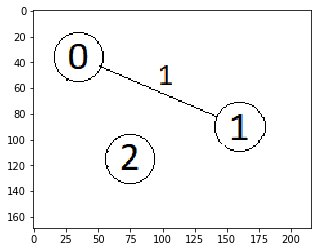

In [34]:
%pylab inline

img = mpimg.imread('disconnected.png')
imgplot = plt.imshow(img)
plt.show()

In [35]:
g = Graph([0,1,2])
g.addEdge(0,1,1)
g.addEdge(1,0,1)

path = g.executeAStar(0) # executes the algorithm
total_cost = g.get_cost(path)
if total_cost:
    print_path(path)
    print("total_cost",total_cost)
else:
    print('Did not reach the goal!')

Initial node: 0
-------------------Iteration no. 1 -------------------
Successor of 0 :  [(1, 1)]
Remaining nodes: [1, 2]
Node: 1 f_cost: 1 g_cost: 1 h_cost: 0
CHOSEN NODE : 
Parent: 0 Child: 1 f_cost: 1 g_cost: 1 h_cost: 0
Visited nodes till now: [0, 1]
-------------------Iteration no. 2 -------------------
Successor of 1 :  []
-------------------Iteration no. 2 -------------------
Error : Goal state cannot be reached. Graph is not connected
Did not reach the goal!


# 4 Testing using Large Fully Connected Graphs

## 4.1 Example : Graph with 10 nodes

In [36]:
nodes=[0,1,2,3,4,5,6,7,8,9]
g = Graph(nodes)
for i in range(10):
    for j in range(10):
        if i>j:
            weight = np.random.randint(20)
            g.addEdge(i,j,weight)
            g.addEdge(j,i,weight)
path = g.executeAStar(0) # executes the algorithm
total_cost = g.get_cost(path)
if total_cost:
    print_path(path)
    print("total_cost",total_cost)
else:
    print('Did not reach the goal!')

Initial node: 0
-------------------Iteration no. 1 -------------------
Successor of 0 :  [(1, 10), (2, 2), (3, 6), (4, 2), (5, 12), (6, 18), (7, 1), (8, 9), (9, 4)]
Remaining nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Node: 1 f_cost: 44 g_cost: 10 h_cost: 34
Remaining nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Node: 2 f_cost: 37 g_cost: 2 h_cost: 35
Remaining nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Node: 3 f_cost: 36 g_cost: 6 h_cost: 30
Remaining nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Node: 4 f_cost: 38 g_cost: 2 h_cost: 36
Remaining nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Node: 5 f_cost: 48 g_cost: 12 h_cost: 36
Remaining nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Node: 6 f_cost: 55 g_cost: 18 h_cost: 37
Remaining nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Node: 7 f_cost: 24 g_cost: 1 h_cost: 23
Remaining nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Node: 8 f_cost: 33 g_cost: 9 h_cost: 24
Remaining nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Node: 9 f_cost: 24 g_cost: 4 h_cost: 20
CHOSEN NODE : 
Parent: 0 Child: 7 f_cost: 24 g_cost: 1 h_cost: 23
V

## 4.2 Example : Graph with 50 nodes

In [37]:
nodes=[]
for i in range(50):
    nodes.append(i)
g = Graph(nodes)
for i in range(50):
    for j in range(50):
        if i>j:
            weight = np.random.randint(20)
            g.addEdge(i,j,weight)
            g.addEdge(j,i,weight)
            
path = g.executeAStar(1) # executes the algorithm
total_cost = g.get_cost(path)
if total_cost:
    print_path(path)
    print("total_cost",total_cost)
else:
    print('Did not reach the goal!')

Initial node: 1
-------------------Iteration no. 1 -------------------
Successor of 1 :  [(0, 4), (2, 13), (3, 1), (4, 17), (5, 10), (6, 8), (7, 10), (8, 8), (9, 6), (10, 0), (11, 0), (12, 7), (13, 5), (14, 0), (15, 2), (16, 13), (17, 6), (18, 8), (19, 2), (20, 5), (21, 11), (22, 2), (23, 4), (24, 7), (25, 7), (26, 19), (27, 5), (28, 12), (29, 9), (30, 19), (31, 0), (32, 19), (33, 15), (34, 13), (35, 3), (36, 18), (37, 11), (38, 5), (39, 13), (40, 8), (41, 14), (42, 1), (43, 9), (44, 11), (45, 7), (46, 15), (47, 2), (48, 11), (49, 12)]
Remaining nodes: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 0 f_cost: 38 g_cost: 4 h_cost: 34
Remaining nodes: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 2 

Node: 32 f_cost: 67 g_cost: 19 h_cost: 48
Remaining nodes: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 33 f_cost: 59 g_cost: 15 h_cost: 44
Remaining nodes: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 34 f_cost: 51 g_cost: 13 h_cost: 38
Remaining nodes: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 35 f_cost: 44 g_cost: 3 h_cost: 41
Remaining nodes: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 36 f_co

Node: 15 f_cost: 65 g_cost: 17 h_cost: 48
Remaining nodes: [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 16 f_cost: 57 g_cost: 16 h_cost: 41
Remaining nodes: [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 17 f_cost: 65 g_cost: 14 h_cost: 51
Remaining nodes: [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 18 f_cost: 47 g_cost: 6 h_cost: 41
Remaining nodes: [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 19 f_cost: 51 g_cost: 5

Node: 49 f_cost: 59 g_cost: 12 h_cost: 47
CHOSEN NODE : 
Parent: 10 Child: 40 f_cost: 28 g_cost: 0 h_cost: 28
Visited nodes till now: [1, 10, 40]
-------------------Iteration no. 3 -------------------
Successor of 40 :  [(0, 13), (2, 9), (3, 2), (4, 0), (5, 19), (6, 17), (7, 7), (8, 7), (9, 18), (11, 16), (12, 12), (13, 11), (14, 7), (15, 16), (16, 11), (17, 1), (18, 10), (19, 16), (20, 2), (21, 11), (22, 8), (23, 5), (24, 11), (25, 11), (26, 15), (27, 11), (28, 16), (29, 4), (30, 19), (31, 13), (32, 19), (33, 7), (34, 8), (35, 7), (36, 11), (37, 10), (38, 10), (39, 3), (41, 12), (42, 10), (43, 10), (44, 18), (45, 15), (46, 14), (47, 8), (48, 4), (49, 18)]
Remaining nodes: [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 0 f_cost: 51 g_cost: 13 h_cost: 38
Remaining nodes: [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 

Node: 33 f_cost: 35 g_cost: 7 h_cost: 28
Remaining nodes: [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 34 f_cost: 54 g_cost: 8 h_cost: 46
Remaining nodes: [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 35 f_cost: 47 g_cost: 7 h_cost: 40
Remaining nodes: [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 36 f_cost: 54 g_cost: 11 h_cost: 43
Remaining nodes: [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 37 f_cost: 43 g_cost: 10 h_cost: 33
Remai

Node: 20 f_cost: 60 g_cost: 9 h_cost: 51
Remaining nodes: [0, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 21 f_cost: 57 g_cost: 5 h_cost: 52
Remaining nodes: [0, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 22 f_cost: 61 g_cost: 17 h_cost: 44
Remaining nodes: [0, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 23 f_cost: 31 g_cost: 0 h_cost: 31
Remaining nodes: [0, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 24 f_cost: 49 g_cost: 9 h_cost: 40
Remaining nodes: [

Node: 6 f_cost: 35 g_cost: 8 h_cost: 27
Remaining nodes: [0, 2, 3, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 7 f_cost: 36 g_cost: 4 h_cost: 32
Remaining nodes: [0, 2, 3, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 8 f_cost: 30 g_cost: 2 h_cost: 28
Remaining nodes: [0, 2, 3, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 9 f_cost: 42 g_cost: 0 h_cost: 42
Remaining nodes: [0, 2, 3, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 11 f_cost: 51 g_cost: 2 h_cost: 49
Remaining nodes: [0, 2, 3, 5, 6, 7, 8, 

Node: 45 f_cost: 60 g_cost: 11 h_cost: 49
Remaining nodes: [0, 2, 3, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 46 f_cost: 33 g_cost: 0 h_cost: 33
Remaining nodes: [0, 2, 3, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 47 f_cost: 52 g_cost: 12 h_cost: 40
Remaining nodes: [0, 2, 3, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 48 f_cost: 57 g_cost: 17 h_cost: 40
Remaining nodes: [0, 2, 3, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 49 f_cost: 48 g_cost: 7 h_cost: 41
CHOSEN NODE : 
Parent: 13 Child:

Node: 34 f_cost: 48 g_cost: 5 h_cost: 43
Remaining nodes: [0, 2, 3, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 35 f_cost: 56 g_cost: 14 h_cost: 42
Remaining nodes: [0, 2, 3, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 36 f_cost: 34 g_cost: 0 h_cost: 34
Remaining nodes: [0, 2, 3, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 37 f_cost: 55 g_cost: 16 h_cost: 39
Remaining nodes: [0, 2, 3, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 38 f_cost: 49 g_cost: 7 h_cost: 42
Remaining nodes: [0, 2, 3, 6, 7, 8, 9, 11, 12

Node: 25 f_cost: 46 g_cost: 8 h_cost: 38
Remaining nodes: [2, 3, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 26 f_cost: 62 g_cost: 15 h_cost: 47
Remaining nodes: [2, 3, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 27 f_cost: 65 g_cost: 17 h_cost: 48
Remaining nodes: [2, 3, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 28 f_cost: 59 g_cost: 17 h_cost: 42
Remaining nodes: [2, 3, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 29 f_cost: 51 g_cost: 18 h_cost: 33
Remaining nodes: [2, 3, 6, 7, 8, 9, 11, 12, 14, 15, 16,

Node: 17 f_cost: 53 g_cost: 6 h_cost: 47
Remaining nodes: [2, 3, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 18 f_cost: 50 g_cost: 7 h_cost: 43
Remaining nodes: [2, 3, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 19 f_cost: 71 g_cost: 18 h_cost: 53
Remaining nodes: [2, 3, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 20 f_cost: 43 g_cost: 6 h_cost: 37
Remaining nodes: [2, 3, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 21 f_cost: 32 g_cost: 5 h_cost: 27
Remaining nodes: [2, 3, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 2

Node: 9 f_cost: 55 g_cost: 14 h_cost: 41
Remaining nodes: [2, 3, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 11 f_cost: 44 g_cost: 1 h_cost: 43
Remaining nodes: [2, 3, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 12 f_cost: 41 g_cost: 13 h_cost: 28
Remaining nodes: [2, 3, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 14 f_cost: 32 g_cost: 7 h_cost: 25
Remaining nodes: [2, 3, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 15 f_cost: 50 g_cost: 7 h_cost: 43
Remaining nodes: [2, 3, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 2

Node: 2 f_cost: 50 g_cost: 11 h_cost: 39
Remaining nodes: [2, 3, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 3 f_cost: 51 g_cost: 10 h_cost: 41
Remaining nodes: [2, 3, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 8 f_cost: 51 g_cost: 18 h_cost: 33
Remaining nodes: [2, 3, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 9 f_cost: 38 g_cost: 8 h_cost: 30
Remaining nodes: [2, 3, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Node: 11 f_cost: 36 g_cost: 2 h_cost: 34
Remaining nodes: [2, 3, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29

Node: 49 f_cost: 48 g_cost: 16 h_cost: 32
CHOSEN NODE : 
Parent: 7 Child: 42 f_cost: 28 g_cost: 1 h_cost: 27
Visited nodes till now: [1, 10, 40, 4, 13, 5, 0, 6, 39, 7, 42]
-------------------Iteration no. 11 -------------------
Successor of 42 :  [(2, 10), (3, 1), (8, 0), (9, 18), (11, 11), (12, 7), (14, 4), (15, 0), (16, 4), (17, 4), (18, 8), (19, 7), (20, 1), (21, 10), (22, 6), (23, 6), (24, 15), (25, 6), (26, 2), (27, 3), (28, 2), (29, 12), (30, 7), (31, 11), (32, 3), (33, 6), (34, 9), (35, 3), (36, 13), (37, 9), (38, 19), (41, 4), (43, 4), (44, 6), (45, 1), (46, 14), (47, 13), (48, 14), (49, 1)]
Remaining nodes: [2, 3, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 45, 46, 47, 48, 49]
Node: 2 f_cost: 44 g_cost: 11 h_cost: 33
Remaining nodes: [2, 3, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 45, 46, 47, 48, 49]
Node: 3 f_co

Node: 48 f_cost: 49 g_cost: 15 h_cost: 34
Remaining nodes: [2, 3, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 45, 46, 47, 48, 49]
Node: 49 f_cost: 36 g_cost: 2 h_cost: 34
CHOSEN NODE : 
Parent: 42 Child: 8 f_cost: 28 g_cost: 1 h_cost: 27
Visited nodes till now: [1, 10, 40, 4, 13, 5, 0, 6, 39, 7, 42, 8]
-------------------Iteration no. 12 -------------------
Successor of 8 :  [(2, 17), (3, 1), (9, 4), (11, 8), (12, 1), (14, 18), (15, 14), (16, 17), (17, 12), (18, 4), (19, 4), (20, 5), (21, 17), (22, 7), (23, 0), (24, 17), (25, 13), (26, 7), (27, 3), (28, 1), (29, 17), (30, 8), (31, 4), (32, 11), (33, 6), (34, 1), (35, 16), (36, 2), (37, 0), (38, 15), (41, 8), (43, 12), (44, 13), (45, 15), (46, 8), (47, 19), (48, 6), (49, 18)]
Remaining nodes: [2, 3, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 45, 46, 47, 48, 49]
Node: 2 f_cost: 

Node: 48 f_cost: 46 g_cost: 7 h_cost: 39
Remaining nodes: [2, 3, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 45, 46, 47, 48, 49]
Node: 49 f_cost: 59 g_cost: 19 h_cost: 40
CHOSEN NODE : 
Parent: 8 Child: 23 f_cost: 28 g_cost: 1 h_cost: 27
Visited nodes till now: [1, 10, 40, 4, 13, 5, 0, 6, 39, 7, 42, 8, 23]
-------------------Iteration no. 13 -------------------
Successor of 23 :  [(2, 1), (3, 6), (9, 7), (11, 4), (12, 18), (14, 5), (15, 12), (16, 18), (17, 13), (18, 12), (19, 7), (20, 4), (21, 1), (22, 7), (24, 0), (25, 18), (26, 8), (27, 18), (28, 12), (29, 2), (30, 1), (31, 12), (32, 12), (33, 6), (34, 16), (35, 11), (36, 1), (37, 6), (38, 12), (41, 19), (43, 18), (44, 4), (45, 15), (46, 5), (47, 18), (48, 8), (49, 7)]
Remaining nodes: [2, 3, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 45, 46, 47, 48, 49]
Node: 2 f_cost: 32 g_cost: 

Node: 49 f_cost: 44 g_cost: 8 h_cost: 36
CHOSEN NODE : 
Parent: 23 Child: 24 f_cost: 28 g_cost: 1 h_cost: 27
Visited nodes till now: [1, 10, 40, 4, 13, 5, 0, 6, 39, 7, 42, 8, 23, 24]
-------------------Iteration no. 14 -------------------
Successor of 24 :  [(2, 14), (3, 17), (9, 18), (11, 13), (12, 13), (14, 4), (15, 12), (16, 18), (17, 16), (18, 19), (19, 12), (20, 16), (21, 6), (22, 1), (25, 14), (26, 2), (27, 17), (28, 3), (29, 11), (30, 5), (31, 5), (32, 8), (33, 15), (34, 19), (35, 8), (36, 9), (37, 18), (38, 3), (41, 15), (43, 5), (44, 4), (45, 0), (46, 12), (47, 10), (48, 3), (49, 8)]
Remaining nodes: [2, 3, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 45, 46, 47, 48, 49]
Node: 2 f_cost: 50 g_cost: 15 h_cost: 35
Remaining nodes: [2, 3, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 45, 46, 47, 48, 49]
Node: 3 f_cost: 60 g_cost: 18 h_cost: 42


Node: 3 f_cost: 47 g_cost: 10 h_cost: 37
Remaining nodes: [2, 3, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48, 49]
Node: 9 f_cost: 28 g_cost: 2 h_cost: 26
Remaining nodes: [2, 3, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48, 49]
Node: 11 f_cost: 36 g_cost: 9 h_cost: 27
Remaining nodes: [2, 3, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48, 49]
Node: 12 f_cost: 43 g_cost: 6 h_cost: 37
Remaining nodes: [2, 3, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48, 49]
Node: 14 f_cost: 36 g_cost: 6 h_cost: 30
Remaining nodes: [2, 3, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48, 49]
Node: 15 f_cost: 46 g

Node: 17 f_cost: 54 g_cost: 8 h_cost: 46
Remaining nodes: [2, 3, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48, 49]
Node: 18 f_cost: 61 g_cost: 18 h_cost: 43
Remaining nodes: [2, 3, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48, 49]
Node: 19 f_cost: 28 g_cost: 2 h_cost: 26
Remaining nodes: [2, 3, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48, 49]
Node: 20 f_cost: 43 g_cost: 8 h_cost: 35
Remaining nodes: [2, 3, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48, 49]
Node: 21 f_cost: 29 g_cost: 3 h_cost: 26
Remaining nodes: [2, 3, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48, 49]
Node: 22 f_cost: 52 g_cost: 21 h_c

Node: 26 f_cost: 46 g_cost: 5 h_cost: 41
Remaining nodes: [2, 3, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48, 49]
Node: 27 f_cost: 28 g_cost: 2 h_cost: 26
Remaining nodes: [2, 3, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48, 49]
Node: 28 f_cost: 65 g_cost: 17 h_cost: 48
Remaining nodes: [2, 3, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48, 49]
Node: 29 f_cost: 49 g_cost: 12 h_cost: 37
Remaining nodes: [2, 3, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48, 49]
Node: 30 f_cost: 68 g_cost: 8 h_cost: 60
Remaining nodes: [2, 3, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48, 49]
Node: 31 f_cost: 56 g_cost: 15 h_cost: 41
Remaining n

Node: 35 f_cost: 51 g_cost: 17 h_cost: 34
Remaining nodes: [2, 3, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48, 49]
Node: 36 f_cost: 32 g_cost: 7 h_cost: 25
Remaining nodes: [2, 3, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48, 49]
Node: 37 f_cost: 44 g_cost: 17 h_cost: 27
Remaining nodes: [2, 3, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48, 49]
Node: 38 f_cost: 49 g_cost: 18 h_cost: 31
Remaining nodes: [2, 3, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48, 49]
Node: 41 f_cost: 36 g_cost: 11 h_cost: 25
Remaining nodes: [2, 3, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48, 49]
Node: 43 f_cost: 39 g_cost: 15 h_cost: 24
Remaining nodes: [2, 3, 11, 1

Node: 2 f_cost: 38 g_cost: 9 h_cost: 29
Remaining nodes: [2, 3, 11, 12, 14, 15, 16, 17, 18, 20, 21, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 3 f_cost: 36 g_cost: 8 h_cost: 28
Remaining nodes: [2, 3, 11, 12, 14, 15, 16, 17, 18, 20, 21, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 11 f_cost: 45 g_cost: 13 h_cost: 32
Remaining nodes: [2, 3, 11, 12, 14, 15, 16, 17, 18, 20, 21, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 12 f_cost: 53 g_cost: 22 h_cost: 31
Remaining nodes: [2, 3, 11, 12, 14, 15, 16, 17, 18, 20, 21, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 14 f_cost: 49 g_cost: 21 h_cost: 28
Remaining nodes: [2, 3, 11, 12, 14, 15, 16, 17, 18, 20, 21, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 15 f_cost: 43 g_cost: 13 h_cost: 30
Remaining nodes: [2, 3, 11, 12, 14, 15, 16, 17, 18, 20, 21, 25, 26, 28, 

Node: 34 f_cost: 44 g_cost: 14 h_cost: 30
Remaining nodes: [2, 3, 11, 12, 14, 15, 17, 18, 20, 21, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 35 f_cost: 60 g_cost: 22 h_cost: 38
Remaining nodes: [2, 3, 11, 12, 14, 15, 17, 18, 20, 21, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 36 f_cost: 47 g_cost: 11 h_cost: 36
Remaining nodes: [2, 3, 11, 12, 14, 15, 17, 18, 20, 21, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 37 f_cost: 60 g_cost: 10 h_cost: 50
Remaining nodes: [2, 3, 11, 12, 14, 15, 17, 18, 20, 21, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 38 f_cost: 51 g_cost: 7 h_cost: 44
Remaining nodes: [2, 3, 11, 12, 14, 15, 17, 18, 20, 21, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 41 f_cost: 49 g_cost: 13 h_cost: 36
Remaining nodes: [2, 3, 11, 12, 14, 15, 17, 18, 20, 21, 25, 26, 28, 29, 30, 31, 32, 33, 3

Node: 25 f_cost: 33 g_cost: 5 h_cost: 28
Remaining nodes: [2, 3, 11, 12, 14, 17, 20, 21, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 26 f_cost: 46 g_cost: 15 h_cost: 31
Remaining nodes: [2, 3, 11, 12, 14, 17, 20, 21, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 28 f_cost: 38 g_cost: 9 h_cost: 29
Remaining nodes: [2, 3, 11, 12, 14, 17, 20, 21, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 29 f_cost: 49 g_cost: 17 h_cost: 32
Remaining nodes: [2, 3, 11, 12, 14, 17, 20, 21, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 30 f_cost: 32 g_cost: 4 h_cost: 28
Remaining nodes: [2, 3, 11, 12, 14, 17, 20, 21, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 31 f_cost: 36 g_cost: 7 h_cost: 29
Remaining nodes: [2, 3, 11, 12, 14, 17, 20, 21, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 32

Node: 20 f_cost: 36 g_cost: 8 h_cost: 28
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 21 f_cost: 49 g_cost: 11 h_cost: 38
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 25 f_cost: 29 g_cost: 5 h_cost: 24
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 26 f_cost: 42 g_cost: 20 h_cost: 22
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 28 f_cost: 45 g_cost: 16 h_cost: 29
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 29 f_cost: 38 g_cost: 15 h_cost: 23
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 31 f_cost: 28 g_cost: 4 h_cost: 24
Remaining nod

Node: 14 f_cost: 47 g_cost: 19 h_cost: 28
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 29, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 20 f_cost: 72 g_cost: 23 h_cost: 49
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 29, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 21 f_cost: 51 g_cost: 21 h_cost: 30
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 29, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 25 f_cost: 42 g_cost: 17 h_cost: 25
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 29, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 26 f_cost: 50 g_cost: 22 h_cost: 28
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 29, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 29 f_cost: 47 g_cost: 18 h_cost: 29
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 29, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 46, 47, 48]
Node: 32 f_cost: 37 g_cost: 8 h_cost: 29
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 29, 32,

Node: 2 f_cost: 32 g_cost: 13 h_cost: 19
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 29, 32, 34, 35, 36, 37, 38, 41, 43, 44, 46]
Node: 3 f_cost: 31 g_cost: 11 h_cost: 20
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 29, 32, 34, 35, 36, 37, 38, 41, 43, 44, 46]
Node: 11 f_cost: 32 g_cost: 10 h_cost: 22
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 29, 32, 34, 35, 36, 37, 38, 41, 43, 44, 46]
Node: 12 f_cost: 30 g_cost: 7 h_cost: 23
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 29, 32, 34, 35, 36, 37, 38, 41, 43, 44, 46]
Node: 14 f_cost: 40 g_cost: 16 h_cost: 24
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 29, 32, 34, 35, 36, 37, 38, 41, 43, 44, 46]
Node: 20 f_cost: 69 g_cost: 24 h_cost: 45
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 29, 32, 34, 35, 36, 37, 38, 41, 43, 44, 46]
Node: 21 f_cost: 68 g_cost: 21 h_cost: 47
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 29, 32, 34, 35, 36, 37, 38, 41, 43, 44, 46]
Node: 25 f_cost: 38 g_cost: 16 h_cost

Node: 11 f_cost: 32 g_cost: 11 h_cost: 21
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 29, 32, 34, 36, 41, 43, 44, 46]
Node: 12 f_cost: 50 g_cost: 27 h_cost: 23
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 29, 32, 34, 36, 41, 43, 44, 46]
Node: 14 f_cost: 55 g_cost: 28 h_cost: 27
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 29, 32, 34, 36, 41, 43, 44, 46]
Node: 20 f_cost: 66 g_cost: 25 h_cost: 41
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 29, 32, 34, 36, 41, 43, 44, 46]
Node: 21 f_cost: 52 g_cost: 14 h_cost: 38
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 29, 32, 34, 36, 41, 43, 44, 46]
Node: 25 f_cost: 40 g_cost: 16 h_cost: 24
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 29, 32, 34, 36, 41, 43, 44, 46]
Node: 26 f_cost: 28 g_cost: 10 h_cost: 18
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 29, 32, 34, 36, 41, 43, 44, 46]
Node: 29 f_cost: 44 g_cost: 18 h_cost: 26
Remaining nodes: [2, 3, 11, 12, 14, 20, 21, 25, 26, 29, 32, 34, 36, 41, 43, 

Node: 44 f_cost: 43 g_cost: 29 h_cost: 14
Remaining nodes: [2, 11, 14, 20, 21, 25, 29, 32, 34, 36, 41, 44, 46]
Node: 46 f_cost: 45 g_cost: 31 h_cost: 14
CHOSEN NODE : 
Parent: 43 Child: 32 f_cost: 28 g_cost: 17 h_cost: 11
Visited nodes till now: [1, 10, 40, 4, 13, 5, 0, 6, 39, 7, 42, 8, 23, 24, 45, 9, 19, 27, 49, 22, 16, 15, 18, 17, 30, 31, 28, 48, 47, 33, 35, 38, 37, 26, 12, 3, 43, 32]
-------------------Iteration no. 38 -------------------
Successor of 32 :  [(2, 3), (11, 2), (14, 12), (20, 16), (21, 16), (25, 7), (29, 14), (34, 16), (36, 16), (41, 4), (44, 15), (46, 5)]
Remaining nodes: [2, 11, 14, 20, 21, 25, 29, 34, 36, 41, 44, 46]
Node: 2 f_cost: 42 g_cost: 20 h_cost: 22
Remaining nodes: [2, 11, 14, 20, 21, 25, 29, 34, 36, 41, 44, 46]
Node: 11 f_cost: 28 g_cost: 19 h_cost: 9
Remaining nodes: [2, 11, 14, 20, 21, 25, 29, 34, 36, 41, 44, 46]
Node: 14 f_cost: 49 g_cost: 29 h_cost: 20
Remaining nodes: [2, 11, 14, 20, 21, 25, 29, 34, 36, 41, 44, 46]
Node: 20 f_cost: 53 g_cost: 33 h_cos

Parent: 36 Child: 41 f_cost: 29 g_cost: 29 h_cost: 0
Visited nodes till now: [1, 10, 40, 4, 13, 5, 0, 6, 39, 7, 42, 8, 23, 24, 45, 9, 19, 27, 49, 22, 16, 15, 18, 17, 30, 31, 28, 48, 47, 33, 35, 38, 37, 26, 12, 3, 43, 32, 11, 2, 21, 25, 46, 44, 36, 41]
-------------------Iteration no. 46 -------------------
Successor of 41 :  [(14, 18), (20, 9), (29, 10), (34, 16)]
Remaining nodes: [14, 20, 29, 34]
Node: 14 f_cost: 47 g_cost: 47 h_cost: 0
Remaining nodes: [14, 20, 29, 34]
Node: 20 f_cost: 38 g_cost: 38 h_cost: 0
Remaining nodes: [14, 20, 29, 34]
Node: 29 f_cost: 39 g_cost: 39 h_cost: 0
Remaining nodes: [14, 20, 29, 34]
Node: 34 f_cost: 45 g_cost: 45 h_cost: 0
CHOSEN NODE : 
Parent: 41 Child: 20 f_cost: 38 g_cost: 38 h_cost: 0
Visited nodes till now: [1, 10, 40, 4, 13, 5, 0, 6, 39, 7, 42, 8, 23, 24, 45, 9, 19, 27, 49, 22, 16, 15, 18, 17, 30, 31, 28, 48, 47, 33, 35, 38, 37, 26, 12, 3, 43, 32, 11, 2, 21, 25, 46, 44, 36, 41, 20]
-------------------Iteration no. 47 -------------------
Succes

# 5. Final Remarks

+ In partially disconnected graphs, h_cost can sometimes become 0, as temporary graph that was passed to PrimMST could have been disconnected.    Example. 3.1 Case A, in 2nd iteration, there is no possible MST with nodes (2,3,4), as there is no edge between 2 and 3. As a result MST cost will be 0

+ Path may or may not exist for partally connected graphs depending on the choice of starting node

+ Path always exist for fully connected graphs but the cost may vary depending upon the choice of starting node.

+ The above implementation of A* uses priority queue to add the minimum node amongst all the successors for every iteration.

+ All the successor nodes are not added in priority queue to prevent the repeatition of nodes in priority queue. On the contrary, if we added all the successors :
  
  + For example, if (1,2,3) are successors of 0 then, priority queue will contain (1,2,3) 
  + Now 1 is chosen and removed from queue, and it's successors are (2,3) then queue will contain (2,2,3,3). At some point in time, if first 2 was removed and added to visited_nodes, and some time later if second 2 is removed, it will cause repeatitions in visited_nodes itself. And thus we won't be able to find a solution.
  + To prevent this, only minimum f_cost successor node was added to the queue